# The Sparks Foundation-GRIP-Data Science and Business Analytics-August'2021
### Task 1: Prediction using Supervised ML
### Author: Saifur Rahman Shatil

#### Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Dataset

In [103]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.shape

(25, 2)

#### Exploring the data

In [104]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [105]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [106]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualization

In [107]:
import seaborn as sns

In [108]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

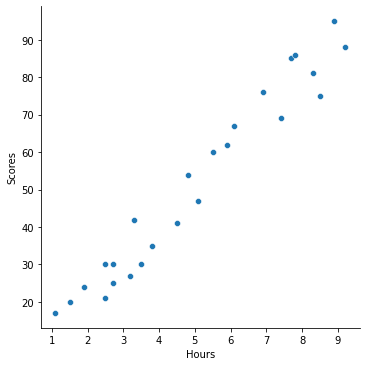

In [109]:
sns.relplot(x='Hours',y='Scores',data=df)

<AxesSubplot:xlabel='Hours'>

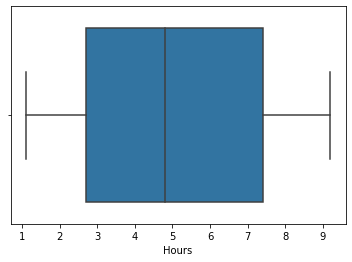

In [110]:
sns.boxplot(x='Hours',data=df)

<AxesSubplot:xlabel='Scores'>

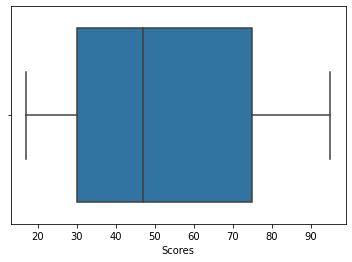

In [111]:
sns.boxplot(x='Scores', data= df)

##### Conclusion: No null values, No outliers, Linear relationship between hours and scores

### Preparing the data

In [112]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [113]:
x = df.iloc[:,:-1].values
print("x values: {}".format(x))
y= df.iloc[:,-1].values
print("y values: {}".format(y))

x values: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y values: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Spliting the dataset into train and test set

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 23)

In [116]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### Training the algorithm

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
model=LinearRegression()

In [119]:
model.fit(x_train,y_train)
print("Training complete")

Training complete


In [120]:
training_accuracy= model.score(x_train,y_train)
print("Training accuracy: {:0.2f}%".format(training_accuracy*100))

Training accuracy: 95.02%


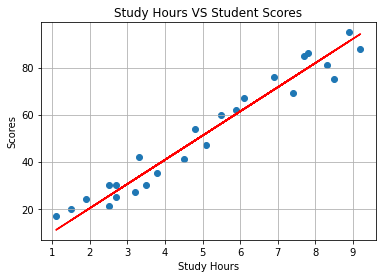

In [121]:
# Ploting regression line
line = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x,line, color="red")
plt.title("Study Hours VS Student Scores")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

### Making Predictions

In [122]:
y_pred= model.predict(x_test)

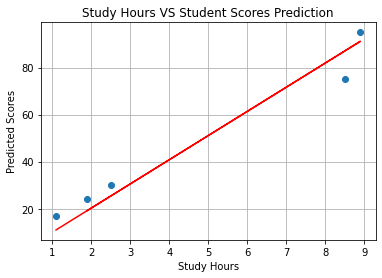

In [123]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.title("Study Hours VS Student Scores Prediction")
plt.xlabel("Study Hours")
plt.ylabel("Predicted Scores")
plt.grid(True)
plt.show()

In [124]:
score_df = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': y_pred})  
score_df 

,Actual_Score,Predicted_Score
0,24,19.195644
1,30,25.364157
2,95,91.161635
3,75,87.049293
4,17,10.970959


In [125]:
score_df.to_csv('predictions.csv',index=False)

#### Making own predictions

In [126]:
hours = [[9.25],[3.4],[6.98]]
own_pred = model.predict(hours)
hours= list(np.concatenate(hours).flat)
own_df = pd.DataFrame({'Hour': hours, 'Predicted_Score': own_pred})  
own_df.to_csv('own_predictions.csv',index=False)
own_df

,Hour,Predicted_Score
0,9.25,94.759935
1,3.40,34.616928
2,6.98,71.422392


### Evaluating the model

In [127]:
train_accuracy=training_accuracy= model.score(x_train,y_train)
print("Training accuracy: {:0.2f}%".format(training_accuracy*100))

Training accuracy: 95.02%


In [128]:
testing_accuracy= model.score(x_test,y_test)
print("Testing accuracy: {:0.2f}%".format(testing_accuracy*100))

Testing accuracy: 94.98%


In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [130]:
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred)))
print("Coefficient of determination(r2_score): {}".format(r2_score(y_test,y_pred)))

Mean Absolute Error: 6.271379442109291
Mean Squared Error: 48.16814286646691
Coefficient of determination(r2_score): 0.9498123042568278
